# Decision Tree Classification

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [158]:
df = pd.read_csv("C:/Users/redye/OneDrive/Documents/decision_tree_classifier_training_data.csv")

In [159]:
# using apply function to create new columns containing categorisation of Age, Licence and Polcy
df['Age = High Risk'] = df.apply(lambda row: row["Age of Driver"] <25 or row["Age of Driver"] >74, axis =1)
df['Licence < 4'] = df.apply(lambda row: row["Age of Licence"] <4, axis =1)
df['Policy < 1']  = df.apply(lambda row: row["Age of Policy"] <1, axis =1)
df['First Party Claims'] = df.apply(lambda row: row[5] >0, axis =1)
df['Third Party Claims'] = df.apply(lambda row: row[6] >0, axis =1)
df.head()


,ID,Age of Driver,Age of Licence,Age of Policy,Unspent Convictions,1st Party Claims,3rd Party Claims,No Claims Protection,No Claims,Exp. Driver,Good Driver,Age = High Risk,Licence < 4,Policy < 1,First Party Claims,Third Party Claims
0,1,27,2,3,N,1,0,Y,Y,N,N,False,True,False,True,False
1,2,19,2,0,N,2,0,Y,N,N,N,True,True,True,True,False
2,3,44,21,5,Y,0,0,N,Y,N,N,False,False,False,False,False
3,4,31,7,7,N,0,0,N,Y,N,N,False,False,False,False,False
4,5,38,13,8,N,2,1,Y,N,Y,N,False,False,False,True,True


In [160]:
# remove original data as it has been reformatted to new columns
df.drop('Age of Driver', axis = 1, inplace = True)
df.drop('Age of Licence', axis = 1, inplace = True)
df.drop('Age of Policy', axis = 1, inplace = True)

In [161]:
df.drop(df.columns[2], axis = 1, inplace = True)
df.head()

,ID,Unspent Convictions,3rd Party Claims,No Claims Protection,No Claims,Exp. Driver,Good Driver,Age = High Risk,Licence < 4,Policy < 1,First Party Claims,Third Party Claims
0,1,N,0,Y,Y,N,N,False,True,False,True,False
1,2,N,0,Y,N,N,N,True,True,True,True,False
2,3,Y,0,N,Y,N,N,False,False,False,False,False
3,4,N,0,N,Y,N,N,False,False,False,False,False
4,5,N,1,Y,N,Y,N,False,False,False,True,True


In [162]:
# reorder the columns with the dependent variables as the last three columns
column_names = ['Age = High Risk', 'Licence < 4', 'Policy < 1', 'First Party Claims', 'Third Party Claims', 
                'Unspent Convictions', 'No Claims Protection', 'No Claims', 'Exp. Driver', 'Good Driver', ]
df = df.reindex(columns=column_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age = High Risk       24 non-null     bool  
 1   Licence < 4           24 non-null     bool  
 2   Policy < 1            24 non-null     bool  
 3   First Party Claims    24 non-null     bool  
 4   Third Party Claims    24 non-null     bool  
 5   Unspent Convictions   24 non-null     object
 6   No Claims Protection  24 non-null     object
 7   No Claims             16 non-null     object
 8   Exp. Driver           16 non-null     object
 9   Good Driver           16 non-null     object
dtypes: bool(5), object(5)
memory usage: 1.2+ KB


In [169]:
# split into independent and dependent variable
X_train = df.iloc[:16, 0:-3].values
y = df.iloc[:16, -3:-2].values
X_test = df.iloc[16:, 0:-3].values

In [173]:
# Encode all of the columns as binary cols
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(7):
    X_train[:,i] = le.fit_transform(X_train[:,i])
    X_test[:,i] = le.fit_transform(X_test[:,i])



training = 
[[0 1 0 1 0 0 1]
 [1 1 1 1 0 0 1]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1]
 [0 0 0 0 1 1 0]
 [0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0]
 [1 1 0 1 1 0 1]
 [0 0 0 0 1 1 0]
 [0 1 1 0 0 0 0]
 [1 0 0 1 1 0 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1]
 [0 0 0 1 0 1 0]
 [0 0 1 0 0 0 1]]
test = 
[[0 0 0 1 0 1 0]
 [0 0 0 0 1 0 1]
 [1 1 1 1 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1]
 [1 0 0 1 1 0 0]
 [0 0 1 0 1 1 0]]


In [175]:
## Encode the dependent variables
y = le.fit_transform(y)

[1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0]


In [179]:
# Train the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier

In [186]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y)

DecisionTreeClassifier()

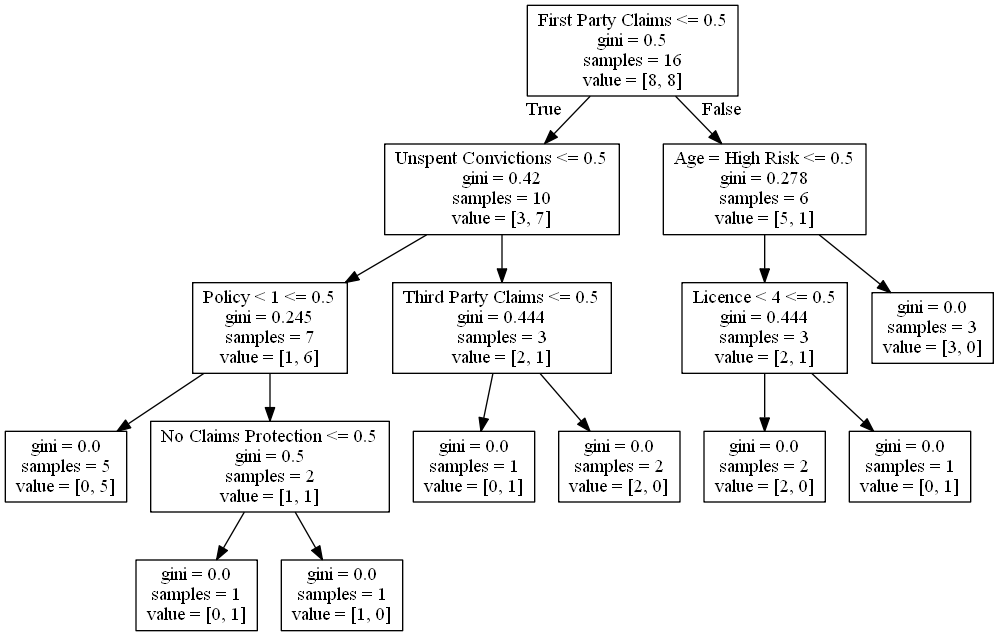

In [187]:
from sklearn.tree import export_graphviz
from graphviz import Source
graph = Source(export_graphviz(classifier, out_file=None, feature_names=df.columns[0:7]))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

In [188]:
classifier2 = DecisionTreeClassifier(criterion = "entropy")
classifier2.fit(X_train, y)

DecisionTreeClassifier(criterion='entropy')

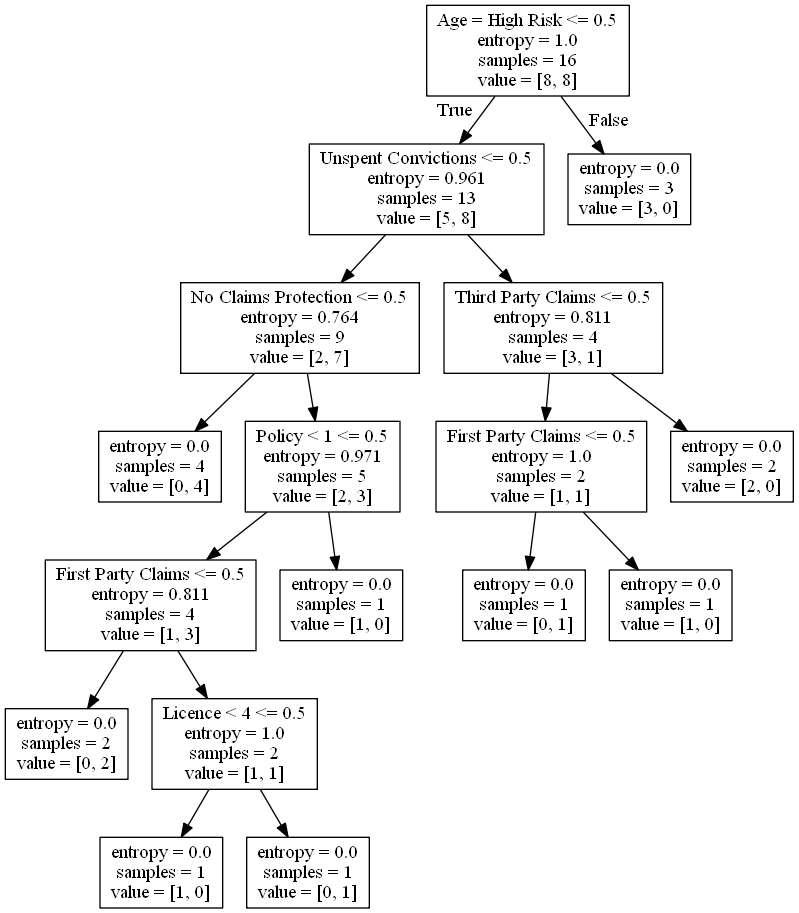

In [189]:
graph = Source(export_graphviz(classifier2, out_file=None, feature_names=df.columns[0:7]))
png_bytes = graph.pipe(format='png')
with open('dtree2_pipe.png','wb') as f:
    f.write(png_bytes)

Image(png_bytes)

In [190]:
y_pred = classifier.predict(X_test)
y_pred2 = classifier2.predict(X_test)

In [191]:
print(y_pred)
print(y_pred2)

[0 1 0 1 1 1 0 0]
[0 1 0 1 1 1 0 0]


In [185]:
print(y_pred)
print(y_pred2)

[1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0]
[1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0]


In [156]:
print(y)

[1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0]
